#### 1. Noise

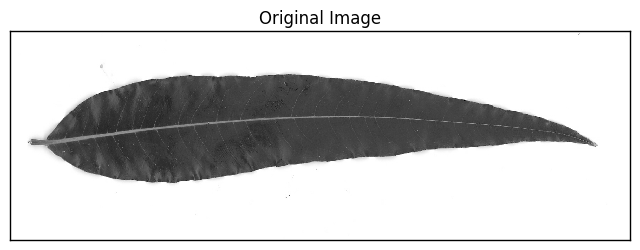

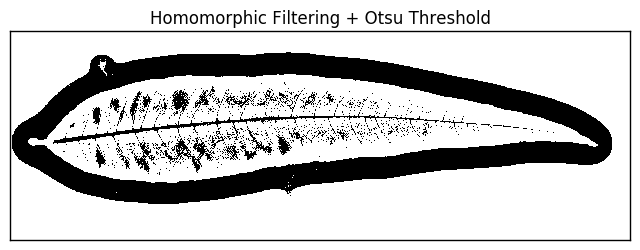

In [30]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import hf

img_path = "D:\\projects\\leaf-vein-segmentation\\doc\\problem\\hojas\\ag1-ag10\\ag1.tif"
gray = cv2.imread(img_path, 0)  # gray-scale loading
gray = gray.T
h, w = gray.shape
# gray = cv2.resize(gray, (w >> 2, h >> 2))
# h, w = gray.shape

plt.figure(figsize=(8, 8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(gray, interpolation='none', cmap='gray')
plt.show()

window_size = (h>>2)
img_back_bin = cv2.adaptiveThreshold(gray, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
cv2.imwrite(img_path + ".contour.adaptive.jpg", img_back_bin)

plt.figure(figsize=(8, 8))
plt.imshow(img_back_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()


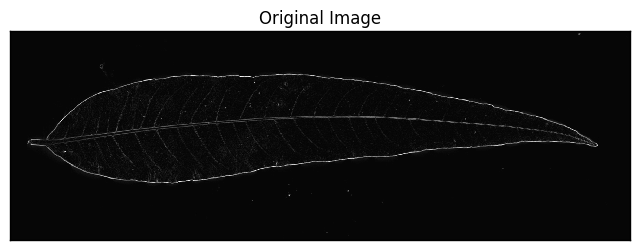

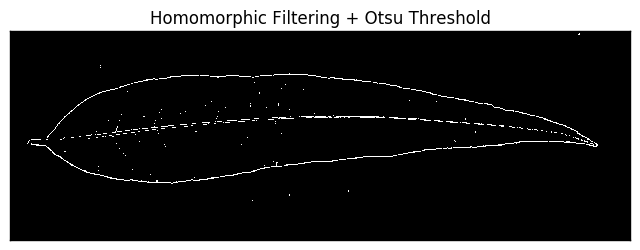

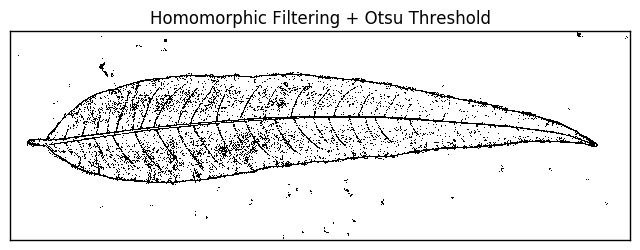

In [6]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import hf
import filters

img_path = "D:\\projects\\leaf-vein-segmentation\\doc\\problem\\hojas\\ag1-ag10\\ag1.tif"
gray = cv2.imread(img_path, 0)  # gray-scale loading
gray = gray.T
h, w = gray.shape
# gray = cv2.resize(gray, (w >> 2, h >> 2))
# h, w = gray.shape

gray = filters.kirsch_filter(gray)
cv2.imwrite(img_path + ".kirsch.jpg", gray)
plt.figure(figsize=(8, 8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(gray, interpolation='none', cmap='gray')
plt.show()

_, gray_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
cv2.imwrite(img_path + ".kirsch.otsu.jpg", gray_bin)
plt.figure(figsize=(8, 8))
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()


window_size = (h>>2)
gray_bin = cv2.adaptiveThreshold(gray, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
cv2.imwrite(img_path + ".kirsch.adaptive.jpg", gray_bin)
plt.figure(figsize=(8, 8))
plt.imshow(img_back_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()


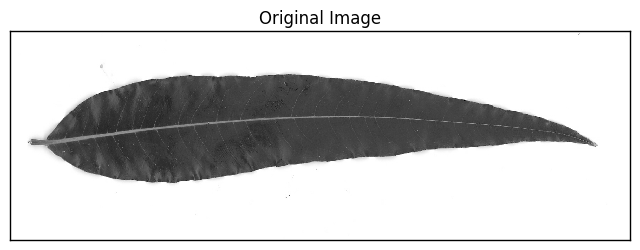

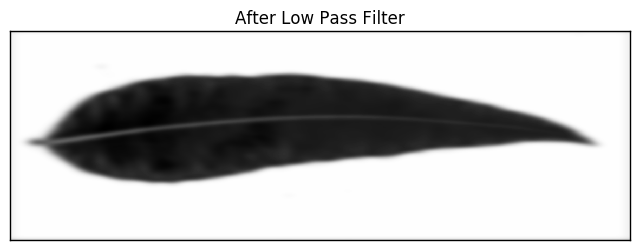

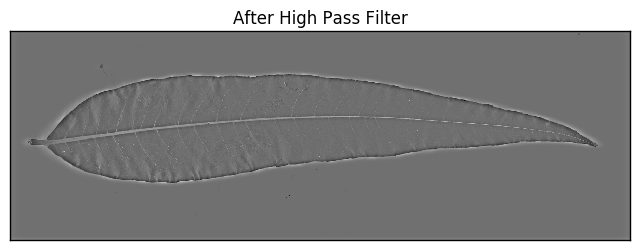

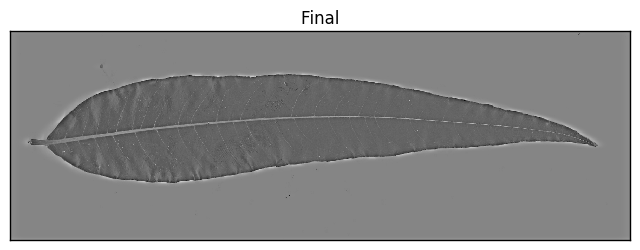

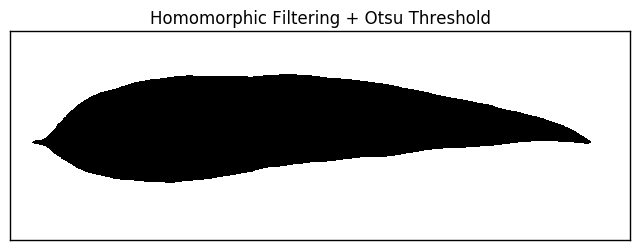

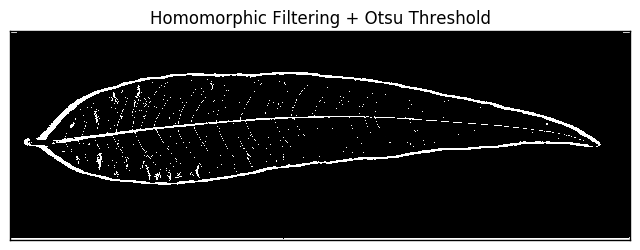

In [32]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import hf

img_path = "D:\\projects\\leaf-vein-segmentation\\doc\\problem\\hojas\\ag1-ag10\\ag1.tif"
gray = cv2.imread(img_path, 0)  # gray-scale loading
gray = gray.T
h, w = gray.shape
# gray = cv2.resize(gray, (w >> 2, h >> 2))
# h, w = gray.shape

plt.figure(figsize=(8, 8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(gray, interpolation='none', cmap='gray')
plt.show()

# homomorphic filtering
rows, cols = gray.shape
M = rows + 1
N = cols + 1
sigma = 20

# M = 2 * rows + 1
# N = 2 * cols + 1
# sigma = 10

# wsize = h>>3
# gray = cv2.bilateralFilter(gray, wsize, 30, wsize)

Ihmf2, Ioutlow_gamma, Iouthigh_gamma = hf.hfilter(gray, M, N, sigma, 0.3, 1.5)

# (X, Y) = np.meshgrid(np.linspace(0, N - 1, N), np.linspace(0, M - 1, M))
# centerX = np.ceil(N / 2)
# centerY = np.ceil(M / 2)
# gaussianNumerator = (X - centerX) ** 2 + (Y - centerY) ** 2

# Hlow = np.exp(-gaussianNumerator / (2 * sigma * sigma))
# Hhigh = 1 - Hlow

# plt.figure(figsize=(8, 8))
# plt.title('Low Pass'), plt.xticks([]), plt.yticks([])
# plt.imshow(Hlow, interpolation='none', cmap='gray')
# plt.show()

# plt.figure(figsize=(8, 8))
# plt.title('High Pass'), plt.xticks([]), plt.yticks([])
# plt.imshow(Hhigh, interpolation='none', cmap='gray')
# plt.show()

# HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
# HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())

# # divides la imagen en alta frecuencia y baja frecuencia
# If = scipy.fftpack.fft2(imgLog.copy(), (M, N))
# Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M, N)))
# Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M, N)))

# # plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
# # plt.imshow(Ioutlow[0:rows, 0:cols], interpolation='none', cmap='gray')
# # plt.show()

# # plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
# # plt.imshow(Iouthigh[0:rows, 0:cols], interpolation='none', cmap='gray')
# # plt.show()

# # las unes con diferentes coeficientes
# gamma1 = 0.3
# gamma2 = 1.5
# Ioutlow_gamma = gamma1 * Ioutlow[0:rows, 0:cols]
# Iouthigh_gamma = gamma2 * Iouthigh[0:rows, 0:cols]
# Iout = Ioutlow_gamma + Iouthigh_gamma

# Ihmf = np.expm1(Iout)
# Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
# Ihmf2 = np.array(255 * Ihmf, dtype="uint8")

plt.figure(figsize=(8, 8))
plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.imshow(Ioutlow_gamma, interpolation='none', cmap='gray')
plt.show()

plt.figure(figsize=(8, 8))
plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
plt.imshow(Iouthigh_gamma, interpolation='none', cmap='gray')
plt.show()

plt.figure(figsize=(8, 8))
plt.title('Final'), plt.xticks([]), plt.yticks([])
plt.imshow(Ihmf2, interpolation='none', cmap='gray')
plt.show()

_, filtered_bin = cv2.threshold(Ioutlow_gamma, 0, 255, cv2.THRESH_OTSU)
plt.figure(figsize=(8, 8))
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

_, filtered_bin = cv2.threshold(Iouthigh_gamma, 0, 255, cv2.THRESH_OTSU)
cv2.imwrite(img_path + ".contour.fft.otsu.jpg", filtered_bin)

img_back_bin = cv2.adaptiveThreshold(Iouthigh_gamma, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
cv2.imwrite(img_path + ".contour.fft.adaptive.jpg", img_back_bin)

plt.figure(figsize=(8, 8))
plt.imshow(filtered_bin, cmap = 'gray', interpolation='none')
plt.title('Homomorphic Filtering + Otsu Threshold'), plt.xticks([]), plt.yticks([])
plt.show()

# - dividir las imagenes en partes??
# - etc.<

In [ ]:

# rows, cols = gray.shape
# 
# # homomorphic filtering
# img = gray
# imgLog = np.log1p(np.array(img, dtype="float") / 255)
# 
# M = 2*rows + 1
# N = 2*cols + 1
# sigma = 10
# (X,Y) = np.meshgrid(np.linspace(0,N-1,N), np.linspace(0,M-1,M))
# centerX = np.ceil(N/2)
# centerY = np.ceil(M/2)
# gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2
# 
# Hlow = np.exp(-gaussianNumerator / (2*sigma*sigma))
# Hhigh = 1 - Hlow
# 
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.imshow(plates[0], interpolation='none')
# plt.show()
# 
# plt.title('Low Pass'), plt.xticks([]), plt.yticks([])
# plt.imshow(Hlow, interpolation='none', cmap='gray')
# plt.show()
# 
# plt.title('High Pass'), plt.xticks([]), plt.yticks([])
# plt.imshow(Hhigh, interpolation='none', cmap='gray')
# plt.show()
# 
# HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
# HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())
# 
# # divides la imagen en alta frecuencia y baja frecuencia
# If = scipy.fftpack.fft2(imgLog.copy(), (M,N))
# Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
# Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))
# 
# # plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
# # plt.imshow(Ioutlow[0:rows, 0:cols], interpolation='none', cmap='gray')
# # plt.show()
# 
# # plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
# # plt.imshow(Iouthigh[0:rows, 0:cols], interpolation='none', cmap='gray')
# # plt.show()
# 
# # las unes con diferentes coeficientes
# gamma1 = 0.3
# gamma2 = 1.5
# Ioutlow_gamma = gamma1*Ioutlow[0:rows,0:cols]
# Iouthigh_gamma = gamma2*Iouthigh[0:rows,0:cols]
# Iout = Ioutlow_gamma + Iouthigh_gamma
# 
# Ihmf = np.expm1(Iout)
# Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
# Ihmf2 = np.array(255*Ihmf, dtype="uint8")
# 
# plt.title('After Low Pass Filter'), plt.xticks([]), plt.yticks([])
# plt.imshow(Ioutlow_gamma, interpolation='none', cmap='gray')
# plt.show()
# 
# plt.title('After High Pass Filter'), plt.xticks([]), plt.yticks([])
# plt.imshow(Iouthigh_gamma, interpolation='none', cmap='gray')
# plt.show()
# 
# plt.title('Final'), plt.xticks([]), plt.yticks([])
# plt.imshow(Ihmf2, interpolation='none', cmap='gray')
# plt.show()
# 
# print("done")